In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')
display(cacao.head(10))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [101]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [102]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
                 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

In [103]:
cacao.head()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [104]:
print(cacao.bar_id.nunique())

1795


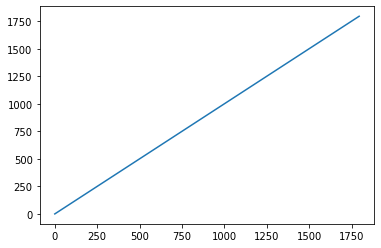

In [105]:
plt.plot(cacao.bar_id)

In [106]:
# это видимо столбец с ИД и он не нужен. удаляем
cacao.drop(['bar_id'], inplace=True, axis=1)

In [107]:
cacao.company.value_counts()

                              99
Soma                          45
Bonnat                        26
Fresco                        26
Pralus                        25
                              ..
Lilla                          1
Lindt & Sprungli               1
Nanea                          1
Chocolats Privilege            1
Chuao Chocolatier (Pralus)     1
Name: company, Length: 408, dtype: int64

In [108]:
cacao.company = cacao.company.apply(lambda x: None if x.strip()=='' else x)

In [ ]:
cacao.company.value_counts()

In [ ]:
# 2.3.2

cacao.specific_origin.value_counts()
# 1013  записей, первая (58 шт) - с пустым полем

In [ ]:
# 2.3.3
# 15 (-1 на строку с пустым значением)
(cacao.specific_origin.value_counts()>10).sum()

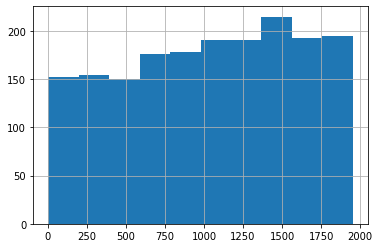

In [109]:
cacao.ref.hist()

In [110]:
cacao.ref.describe()

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

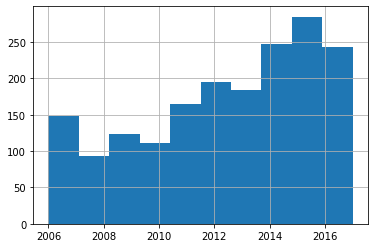

In [111]:
cacao.review_date.hist()

In [112]:
cacao.review_date.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

In [113]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

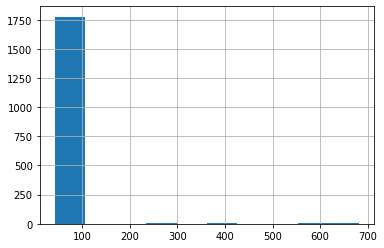

In [114]:
cacao.cocoa_percent.hist()

Границы выбросов:  62.5 ,  82.5


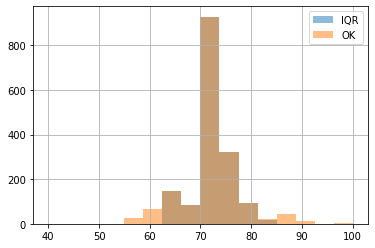

In [115]:
# есть выбросы. как их отсечь
median = cacao.cocoa_percent.median()
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
IQR = perc75 - perc25
print('Границы выбросов: ', perc25-1.5*IQR, ', ', perc75+1.5*IQR)

cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25-1.5*IQR, perc75+1.5*IQR)].hist(alpha=0.5,label='IQR', bins=16, range=(40,100))

cacao.cocoa_percent.loc[cacao.cocoa_percent<100].hist(alpha=0.5, label='OK', bins=16, range=(40,100))
plt.legend()

In [ ]:
cacao.cocoa_percent.loc[cacao.cocoa_percent>100].count()
# есть 19 записей, где указан процент какао больше 100

In [ ]:
cacao = cacao.loc[cacao.cocoa_percent <=100]

In [ ]:
cacao.company_location.value_counts()

In [ ]:
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())

In [ ]:
cacao.loc[:,['company_location']].info()

In [ ]:
cacao.rating.describe()

In [ ]:
cacao.rating.hist()

In [ ]:
# есть выбросы. как их отсечь
median = cacao.rating.median()
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
IQR = perc75 - perc25
print('Границы выбросов: ', perc25-1.5*IQR, ', ', perc75+1.5*IQR)

In [ ]:
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                label='IQR')

In [ ]:
# отфильтруем данные 
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
cacao.info()

In [ ]:
cacao.bean_type.value_counts()

In [ ]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip()=='' else x)

In [ ]:
cacao.bean_type.value_counts()

In [ ]:
print('Значений, встретившихся в столбце более 10 раз:',
      (cacao.bean_type.value_counts() > 10).sum())
print('Уникальных значений:', cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

In [ ]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x)
                                        else None if x == 'nan'
                                        else x if '(' not in x
                                        else x[:x.find('(')].strip())

In [ ]:
print('Значений, встретившихся в столбце более 10 раз:',
      (cacao.bean_type.value_counts() > 10).sum())
print('Уникальных значений:', cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

In [ ]:
cacao.bean_type.value_counts()

In [ ]:
cacao.broad_origin.value_counts()

In [ ]:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip()=='' else x)

In [ ]:
cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else x)

In [ ]:
cacao.broad_origin.nunique()

In [ ]:
cacao.broad_origin.value_counts().loc[cacao.broad_origin.value_counts()>10]

In [ ]:
(cacao.broad_origin.value_counts()>10).sum()

In [ ]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DominicanRepublic')
    x = x.replace('DR', 'DominicanRepublic')
    x = x.replace('Dom.Rep', 'DominicanRepublic')
    x = x.replace('D.R.', 'DominicanRepublic')
    x = x.replace('DominicanRep.', 'DominicanRepublic')
    x = x.replace('Domin.Rep', 'DominicanRepublic')
    x = x.replace('Domin.Re', 'DominicanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [ ]:
display(cacao.head(30))

In [ ]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [ ]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

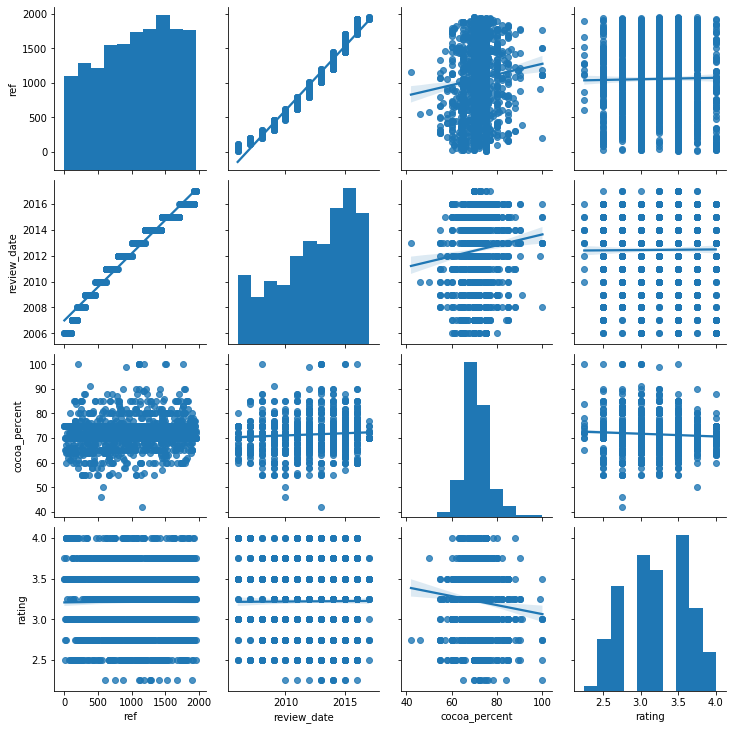

In [94]:
sns.pairplot(cacao, kind='reg')

In [99]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [ ]:
'''ref и review_date сильно коррелируют. можно исключиьт из рассмотрения ref (например) '''

In [96]:
def get_boxplot(column):
    fig, axes = plt.subplots(figsize=(14,4))
    sns.boxplot(x=column,
                y='rating',
                data=cacao.loc[cacao.loc[:,column].isin(cacao.loc[:,column].value_counts().index[:10])],
                ax=axes)
    axes.set_title('Boxplot for '+column)
    plt.xticks(rotation=45)
    plt.show()

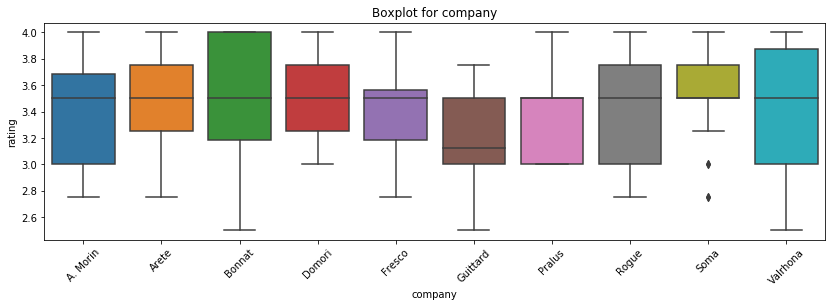

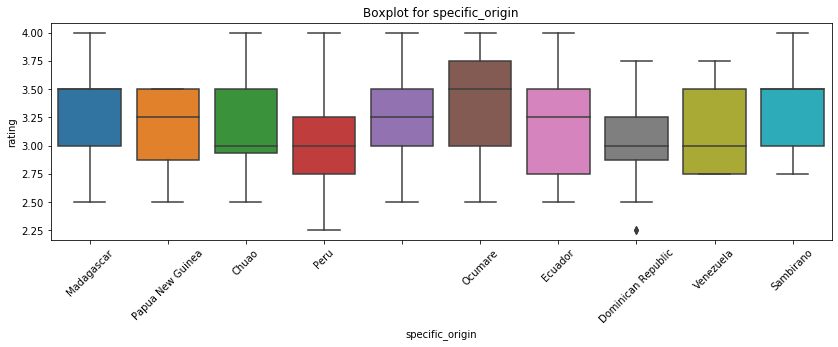

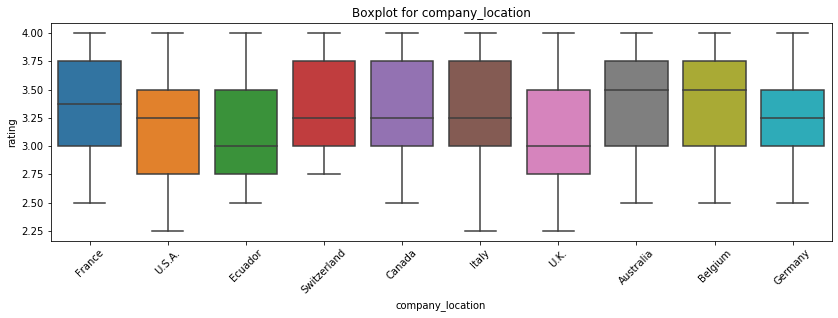

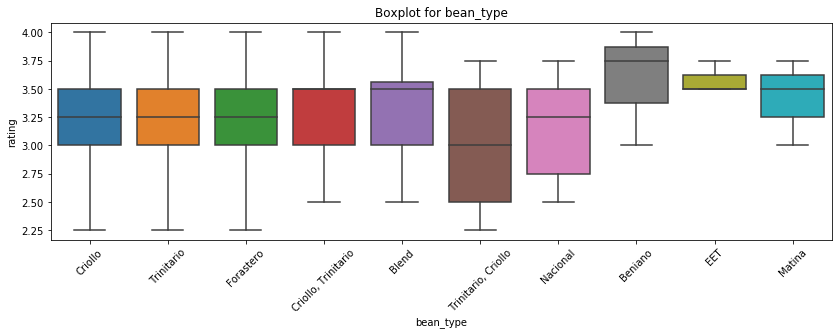

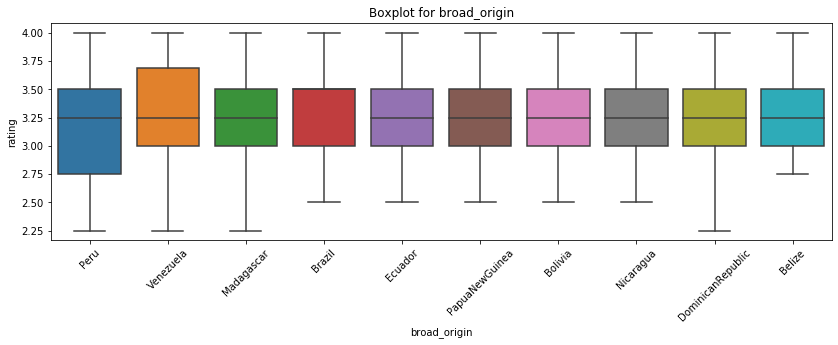

In [97]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [ ]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [98]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [ ]:
# не рассматриваем колонки bean_type, broad_origin

In [ ]:
cacao_for_model = cacao.loc[:,['company', 'specific_origin','company_location', 'review_date', 'cocoa_percent']]

In [ ]:
cacao_for_model.head()

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.